# Summit System Capability

In [19]:
# system node hours, assume 20% overhead
node_hours_yr=int(4608*24*365*0.8)
f"Total number of Summit node hours per year: {node_hours_yr:,}"

'Total number of Summit node hours per year: 32,292,864'

## Per Node Capability

In [26]:
# at smaller scale
# each GPU can do 40TFlops
# 
flops_per_node_max = 6 * 40

# at 13B, a few hundreds scale, JY said it is 15 Tflops

flops_per_node_avg = 6 * 15 

# one node hour can provision

tera_flops_per_node_hour = 6 * 15 * (3600)
peta_flops_per_node_hour = tera_flops_per_node_hour/1000

f"flops per node-hour: {peta_flops_per_node_hour:.0f} peta flops"


'flops per node-hour: 324 peta flops'

## Model size: 13B

In [29]:
# flops needed, 20:1 ratio
flops_13B=120*(13*1e9)**2

# per GPU flops, JY
flops_per_gpu = 15*1e12*0.8

# 10% Summit, 460*6
flops_460_nodes = 460*6*flops_per_gpu

# days needed

f"Training 13B model on 460 summit node takes: {(flops_13B/flops_460_nodes)/(24*3600):.2f} days"

'Training 13B model on 460 summit node takes: 7.09 days'

# Frontier System Capability

## Node capability

In [32]:
## At scale, Sajal measured capability is 37 tera flops per GCD

flops_per_node = 37 * 6 


## 1T model: measured days vs. roofline days

In [29]:
import numpy as np
token_data_ratio = np.arange(1,101)
flops_1T=6*token_data_ratio*(1e12)**2
gcd_flops = 37*(1e12)
frontier_flops = 9000*4*2*gcd_flops
t_days = t_secs/(3600*24)


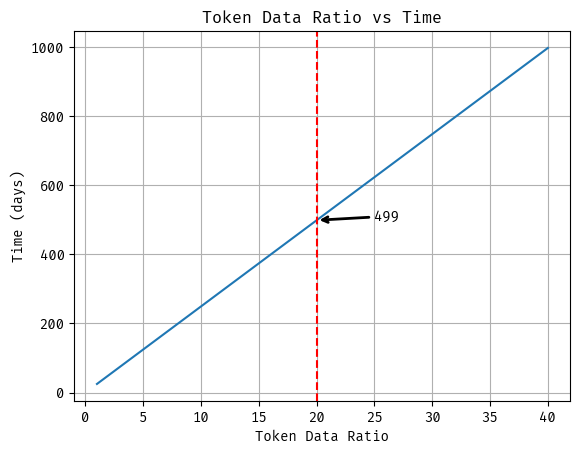

In [36]:
import numpy as np
import matplotlib.pyplot as plt


# Given data
token_data_ratio = np.arange(1, 41)
flops_1T = 6 * token_data_ratio * (1e12)**2
gcd_flops = 37 * (1e12)
frontier_flops = 9408 * 4 * 2 * gcd_flops
t_secs = flops_1T / frontier_flops
t_days = t_secs / (3600 * 24)

# Create the plot
plt.figure()
plt.plot(token_data_ratio, t_days)

# Add vertical line when token_data_ratio=20
plt.axvline(x=20, color='r', linestyle='--')
t_value_at_20 = t_days[np.where(token_data_ratio == 20)][0]
plt.annotate(f"{int(round(t_value_at_20))}", xy=(20, t_value_at_20), xytext=(25, t_value_at_20),
             arrowprops=dict(facecolor='blue', arrowstyle='->', lw=2))

# Set plot properties
plt.xlabel('Token Data Ratio')
plt.ylabel('Time (days)')
plt.title('Token Data Ratio vs Time')
plt.grid(True)
plt.xticks(fontname="Fira Code")
plt.yticks(fontname="Fira Code")

# Show the plot
plt.show()

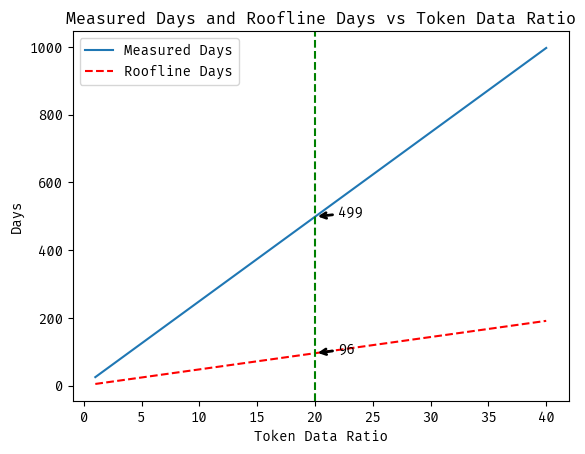

In [38]:
import matplotlib.pyplot as plt
import numpy as np


# Your given data and calculations
token_data_ratio = np.arange(1,41)
flops_1T=6*token_data_ratio*(1e12)**2
measured_gcd_flops  = 37*(1e12)
roofline_gcd_flops=193*(1e12)
measured_frontier_flops = 9408*4*2*measured_gcd_flops
roofline_frontier_flops = 9408*4*2*roofline_gcd_flops
measured_days = flops_1T/(measured_frontier_flops*3600*24)
roofline_days = flops_1T/(roofline_frontier_flops*3600*24)

# Create the plot
plt.figure()

# Plot measured_days vs token_data_ratio
plt.plot(token_data_ratio, measured_days, label='Measured Days')

# Plot roofline_days vs token_data_ratio as a dotted line
plt.plot(token_data_ratio, roofline_days, 'r--', label='Roofline Days')

# Add a vertical line at token_data_ratio=20
plt.axvline(x=20, color='g', linestyle='--')

# Annotate the cross point with value of measured_days and roofline_days
index_20 = np.where(token_data_ratio == 20)[0][0]
measured_value = int(round(measured_days[index_20]))
roofline_value = int(round(roofline_days[index_20]))

plt.annotate(f'{measured_value}', xy=(20, measured_days[index_20]), xytext=(20+2, measured_days[index_20]), arrowprops=dict(facecolor='blue', arrowstyle='->', lw=2))
plt.annotate(f'{roofline_value}', xy=(20, roofline_days[index_20]), xytext=(20+2, roofline_days[index_20]), arrowprops=dict(facecolor='blue', arrowstyle='->', lw=2))

# Setting font to Fira Code
plt.rcParams['font.family'] = 'Fira Code'

# Add labels and title
plt.xlabel('Token Data Ratio')
plt.ylabel('Days')
plt.title('Measured Days and Roofline Days vs Token Data Ratio')
plt.legend()

# Show the plot
plt.show()
